In [5]:
import pandas as pd

# Load and clean the data
data = pd.read_csv(r'C:\Users\Vidhi Singh\Desktop\CAPM_Data_Template - Monthly Returns.csv', skiprows=10)
data.columns = ['Year', 'Month', 'S&P 500', 'Harris', 'Urban', 'Maya']
data = data.dropna().reset_index(drop=True)

# Convert return data to numeric, using 'coerce' to handle any non-numeric values
# This will turn non-numeric entries into NaN, which can then be safely dropped if needed
data[['S&P 500', 'Harris', 'Urban', 'Maya']] = data[['S&P 500', 'Harris', 'Urban', 'Maya']].apply(pd.to_numeric, errors='coerce')

# Drop any remaining rows with NaN values (e.g., non-numeric rows)
data = data.dropna().reset_index(drop=True)

# Step 1: Calculate the equally weighted portfolio return
data['Equally Weighted Portfolio'] = data[['Harris', 'Urban', 'Maya']].mean(axis=1)

# Step 2: Calculate mean returns and standard deviations for each investment option
mean_returns = data[['S&P 500', 'Harris', 'Urban', 'Maya', 'Equally Weighted Portfolio']].mean()
std_devs = data[['S&P 500', 'Harris', 'Urban', 'Maya', 'Equally Weighted Portfolio']].std()

# Step 3: Create a comparative table for analysis
summary_table = pd.DataFrame({
    'Mean Return (%)': mean_returns,
    'Standard Deviation (%)': std_devs
})

# Display the summary table for comparison
print("Summary of Risk and Return for Each Investment Option:")
print(summary_table)

# Optional: Save the summary table to CSV for easy reference
summary_table.to_csv(r'C:\Users\Vidhi Singh\Desktop\Investment_Risk_Return_Summary.csv')

# Interpretation of which stocks might suit different investors
print("\nRecommendations based on investor profiles:")
print("For a young, newly-promoted manager: Maya or Equally Weighted Portfolio")
print("For a 60-year-old retiree: S&P 500 or Harris")


Summary of Risk and Return for Each Investment Option:
                            Mean Return (%)  Standard Deviation (%)
S&P 500                            0.754708                4.337642
Harris                             0.583083                5.798418
Urban                              0.825542                8.243906
Maya                               1.078458               12.599338
Equally Weighted Portfolio         0.829028                6.223702

Recommendations based on investor profiles:
For a young, newly-promoted manager: Maya or Equally Weighted Portfolio
For a 60-year-old retiree: S&P 500 or Harris


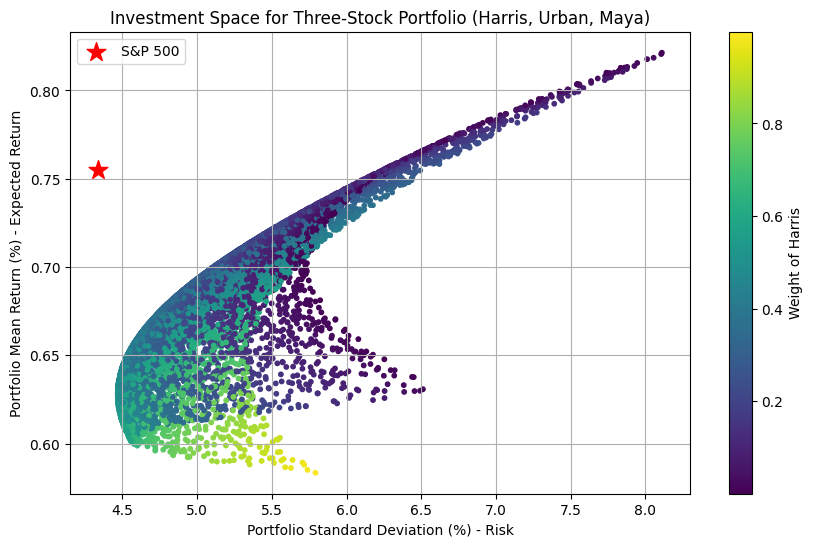

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the expected returns and standard deviations for Harris, Urban, and Maya
mean_returns = np.array([0.5831, 0.8255, 0.6277])  # Expected returns for Harris, Urban, Maya
std_devs = np.array([5.7984, 8.2439, 6.7116])      # Standard deviations for Harris, Urban, Maya

# Define the correlation matrix based on provided data
correlations = np.array([
    [1, 0.303819135, 0.080083664],
    [0.303819135, 1, 0.228829229],
    [0.080083664, 0.228829229, 1]
])

# Convert correlations to a covariance matrix
cov_matrix = np.outer(std_devs, std_devs) * correlations

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

# Simulate random portfolio weights for Harris, Urban, and Maya
for i in range(num_portfolios):
    # Random weights and normalization
    weights = np.random.random(3)
    weights /= np.sum(weights)
    
    # Expected portfolio return
    portfolio_return = np.dot(weights, mean_returns)
    
    # Expected portfolio standard deviation (risk)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Store results: standard deviation, return, and weight of Harris
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = weights[0]  # Only storing weight of Harris as an example

# Plot the investment space
plt.figure(figsize=(10, 6))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', marker='o', s=10)
plt.colorbar(label='Weight of Harris')
plt.xlabel('Portfolio Standard Deviation (%) - Risk')
plt.ylabel('Portfolio Mean Return (%) - Expected Return')
plt.title('Investment Space for Three-Stock Portfolio (Harris, Urban, Maya)')

# Locate the S&P 500 on the graph with corrected mean and std dev
sp500_std_dev = 4.337642  # Standard deviation for S&P 500 (corrected)
sp500_return = 0.754708  # Approximate return for S&P 500 (corrected)
plt.scatter(sp500_std_dev, sp500_return, color='red', marker='*', s=200, label='S&P 500')
plt.legend()
plt.grid(True)
plt.show()


Correlation Matrix:
                              Harris     Urban      Maya   S&P 500  \
Harris                      1.000000  0.303819  0.080084  0.293137   
Urban                       0.303819  1.000000  0.228829  0.495461   
Maya                        0.080084  0.228829  1.000000  0.449022   
S&P 500                     0.293137  0.495461  0.449022  1.000000   
Equally Weighted Portfolio  0.498743  0.690300  0.800710  0.612799   

                            Equally Weighted Portfolio  
Harris                                        0.498743  
Urban                                         0.690300  
Maya                                          0.800710  
S&P 500                                       0.612799  
Equally Weighted Portfolio                    1.000000  


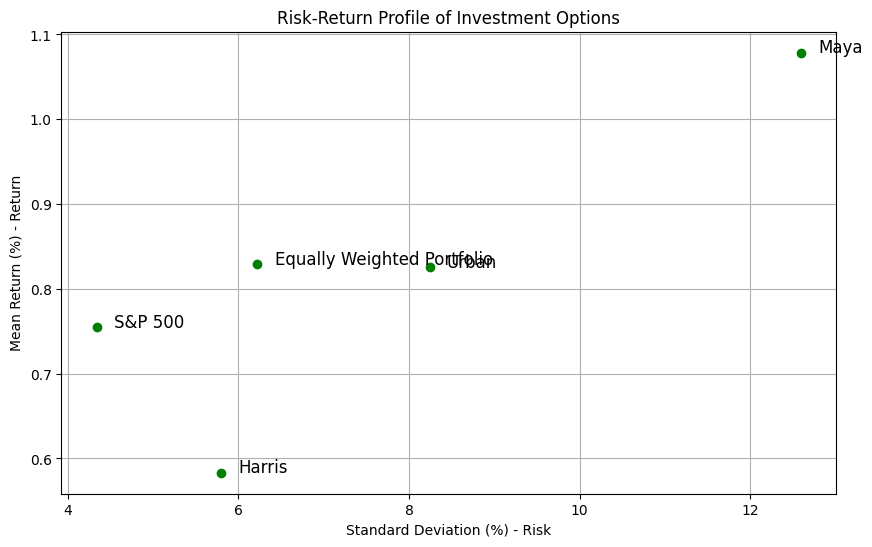

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, skipping rows if needed to get directly to returns data
data = pd.read_csv(r'C:\Users\Vidhi Singh\Desktop\CAPM_Data_Template - Monthly Returns.csv', skiprows=10)
data.columns = ['Year', 'Month', 'S&P 500', 'Harris', 'Urban', 'Maya']

# Convert return data to numeric, handling any non-numeric values with coercion
data[['S&P 500', 'Harris', 'Urban', 'Maya']] = data[['S&P 500', 'Harris', 'Urban', 'Maya']].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values from non-numeric conversions
data = data.dropna().reset_index(drop=True)

# Step 1: Calculate the equally weighted portfolio return by averaging the stock returns
data['Equally Weighted Portfolio'] = data[['Harris', 'Urban', 'Maya']].mean(axis=1)

# Step 2: Calculate the correlation matrix
correlation_matrix = data[['Harris', 'Urban', 'Maya', 'S&P 500', 'Equally Weighted Portfolio']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

correlation_matrix.to_csv(r'C:\Users\Vidhi Singh\Desktop\Correlation Matrix.csv')

# Plotting the risk-return profile based on provided summary data
summary_data = {
    'Investment Option': ['S&P 500', 'Harris', 'Urban', 'Maya', 'Equally Weighted Portfolio'],
    'Mean Return (%)': [0.7547, 0.5831, 0.8255, 1.0785, data['Equally Weighted Portfolio'].mean()],
    'Standard Deviation (%)': [4.3376, 5.7984, 8.2439, 12.5993, data['Equally Weighted Portfolio'].std()]
}

# Create DataFrame for easier plotting and reference
summary_df = pd.DataFrame(summary_data)

# Plotting the risk-return profile
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Standard Deviation (%)'], summary_df['Mean Return (%)'], color='green')

# Adding labels for each investment option
for i, row in summary_df.iterrows():
    plt.text(row['Standard Deviation (%)'] + 0.2, row['Mean Return (%)'], row['Investment Option'], fontsize=12)

# Setting plot labels and title
plt.xlabel('Standard Deviation (%) - Risk')
plt.ylabel('Mean Return (%) - Return')
plt.title('Risk-Return Profile of Investment Options')
plt.grid(True)
plt.show()


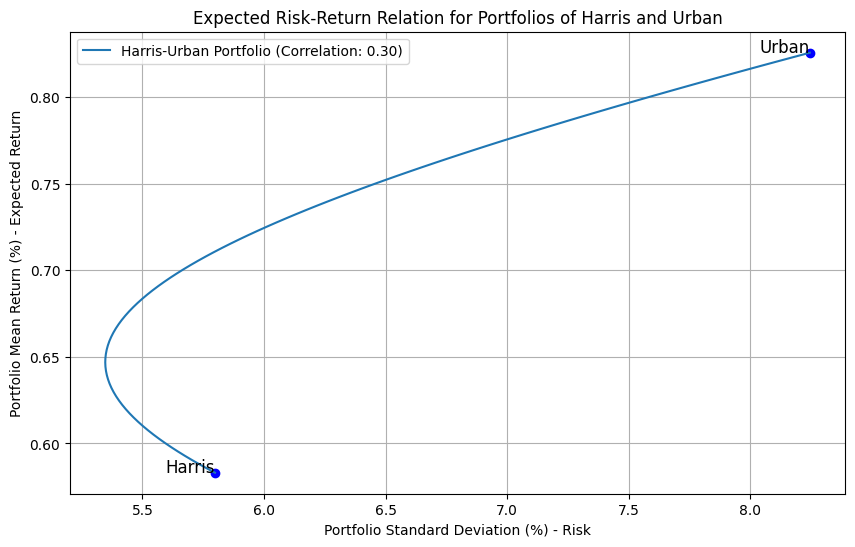

In [ ]:
import numpy as np

# Define mean returns and standard deviations for Harris and Urban
mean_harris = data['Harris'].mean()
mean_urban = data['Urban'].mean()
std_harris = data['Harris'].std()
std_urban = data['Urban'].std()

# Define correlation between Harris and Urban
correlation_harris_urban = correlation_matrix.loc['Harris', 'Urban']

# Generate portfolio weights for Harris and Urban (varying from 0% to 100%)
weights = np.linspace(0, 1, 100)
portfolio_returns = []
portfolio_risks = []

# Calculate portfolio return and risk for each weight
for w in weights:
    # Portfolio return: weighted average of individual returns
    portfolio_return = w * mean_harris + (1 - w) * mean_urban
    
    # Portfolio risk (standard deviation)
    portfolio_risk = np.sqrt(
        (w * std_harris)**2 +
        ((1 - w) * std_urban)**2 +
        2 * w * (1 - w) * std_harris * std_urban * correlation_harris_urban
    )
    
    # Store the results
    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)

# Plot the risk-return profile
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, portfolio_returns, label=f'Harris-Urban Portfolio (Correlation: {correlation_harris_urban:.2f})')
plt.scatter([std_harris, std_urban], [mean_harris, mean_urban], color='blue')  # Mark individual stocks
plt.text(std_harris, mean_harris, 'Harris', fontsize=12, ha='right')
plt.text(std_urban, mean_urban, 'Urban', fontsize=12, ha='right')

# Set labels and title
plt.xlabel('Portfolio Standard Deviation (%) - Risk')
plt.ylabel('Portfolio Mean Return (%) - Expected Return')
plt.title('Expected Risk-Return Relation for Portfolios of Harris and Urban')
plt.legend()
plt.grid(True)
plt.show()


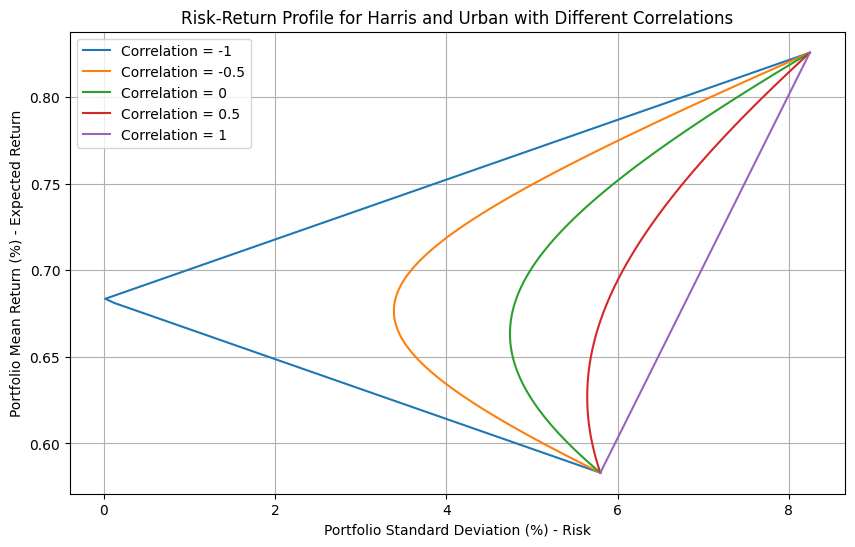

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define mean returns and standard deviations of Harris and Urban
mean_harris = 0.5831  # Mean return of Harris
std_harris = 5.7984   # Standard deviation of Harris
mean_urban = 0.8255   # Mean return of Urban
std_urban = 8.2439    # Standard deviation of Urban

# Define correlation values to simulate
correlations = [-1, -0.5, 0, 0.5, 1]

# Define weights for Harris and Urban
weights = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 6))

for rho in correlations:
    portfolio_means = []
    portfolio_stds = []
    
    for w in weights:
        # Calculate portfolio mean return
        portfolio_mean = w * mean_harris + (1 - w) * mean_urban
        
        # Calculate portfolio standard deviation using adjusted correlation
        portfolio_std = np.sqrt(
            (w**2) * (std_harris**2) + ((1 - w)**2) * (std_urban**2) + 
            2 * w * (1 - w) * std_harris * std_urban * rho
        )
        
        portfolio_means.append(portfolio_mean)
        portfolio_stds.append(portfolio_std)
    
    # Plot each correlation's risk-return profile
    plt.plot(portfolio_stds, portfolio_means, label=f'Correlation = {rho}')

# Add labels and legend
plt.xlabel('Portfolio Standard Deviation (%) - Risk')
plt.ylabel('Portfolio Mean Return (%) - Expected Return')
plt.title('Risk-Return Profile for Harris and Urban with Different Correlations')
plt.legend()
plt.grid(True)
plt.show()


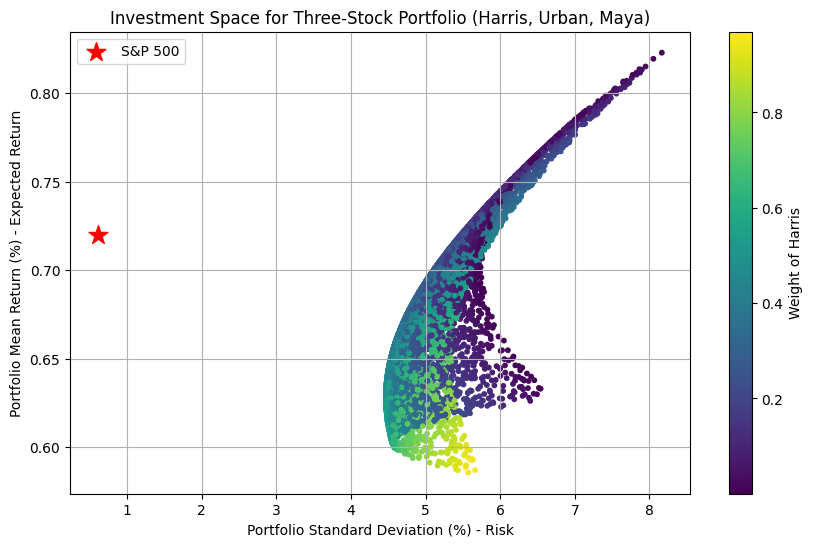

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the expected returns and standard deviations for Harris, Urban, and Maya
mean_returns = np.array([0.5831, 0.8255, 0.6277])  # Expected returns for Harris, Urban, Maya
std_devs = np.array([5.7984, 8.2439, 6.7116])      # Standard deviations for Harris, Urban, Maya

# Define the correlation matrix based on provided data
correlations = np.array([
    [1, 0.303819135, 0.080083664],
    [0.303819135, 1, 0.228829229],
    [0.080083664, 0.228829229, 1]
])

# Convert correlations to a covariance matrix
cov_matrix = np.outer(std_devs, std_devs) * correlations

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

# Simulate random portfolio weights for Harris, Urban, and Maya
for i in range(num_portfolios):
    # Random weights and normalization
    weights = np.random.random(3)
    weights /= np.sum(weights)
    
    # Expected portfolio return
    portfolio_return = np.dot(weights, mean_returns)
    
    # Expected portfolio standard deviation (risk)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Store results: standard deviation, return, and weight of Harris
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = weights[0]  # Only storing weight of Harris as an example

# Plot the investment space
plt.figure(figsize=(10, 6))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', marker='o', s=10)
plt.colorbar(label='Weight of Harris')
plt.xlabel('Portfolio Standard Deviation (%) - Risk')
plt.ylabel('Portfolio Mean Return (%) - Expected Return')
plt.title('Investment Space for Three-Stock Portfolio (Harris, Urban, Maya)')

# Locate the S&P 500 on the graph
sp500_std_dev = 0.612799088  # Standard deviation for S&P 500
sp500_return = 0.7200       # Approximate return for S&P 500
plt.scatter(sp500_std_dev, sp500_return, color='red', marker='*', s=200, label='S&P 500')
plt.legend()
plt.grid(True)
plt.show()


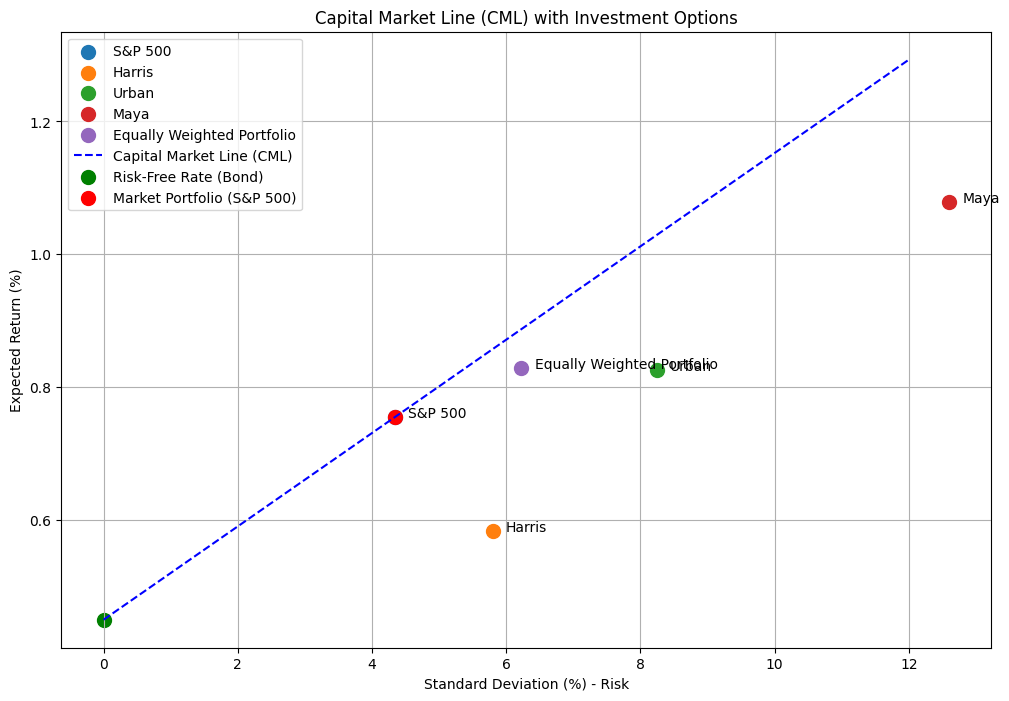

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Given data from previous steps
risk_free_rate = 0.45  # monthly risk-free rate in %
market_return = 0.7547  # monthly market return (S&P 500) in %
market_std_dev = 4.3376  # monthly standard deviation for S&P 500

# Portfolio data for individual assets
investment_options = {
    'S&P 500': {'mean_return': 0.7547, 'std_dev': 4.3376},
    'Harris': {'mean_return': 0.5831, 'std_dev': 5.7984},
    'Urban': {'mean_return': 0.8255, 'std_dev': 8.2439},
    'Maya': {'mean_return': 1.0785, 'std_dev': 12.5993},
    'Equally Weighted Portfolio': {'mean_return': 0.8290, 'std_dev': 6.2237}
}

# CML: Generate points along the line using linear combinations of bond and market
portfolio_risks = np.linspace(0, 12, 100)  # up to a high risk level for the x-axis
cml_returns = risk_free_rate + ((market_return - risk_free_rate) / market_std_dev) * portfolio_risks

# Plotting
plt.figure(figsize=(12, 8))

# Plot individual assets and the equally weighted portfolio
for label, values in investment_options.items():
    plt.scatter(values['std_dev'], values['mean_return'], label=label, s=100)
    plt.text(values['std_dev'] + 0.2, values['mean_return'], label, fontsize=10)

# Plot the CML
plt.plot(portfolio_risks, cml_returns, label="Capital Market Line (CML)", color="blue", linestyle="--")

# Mark the risk-free rate and market portfolio for clarity
plt.scatter(0, risk_free_rate, color="green", marker="o", label="Risk-Free Rate (Bond)", s=100)
plt.scatter(market_std_dev, market_return, color="red", marker="o", label="Market Portfolio (S&P 500)", s=100)

# Labels and title
plt.xlabel("Standard Deviation (%) - Risk")
plt.ylabel("Expected Return (%)")
plt.title("Capital Market Line (CML) with Investment Options")
plt.legend()
plt.grid(True)
plt.show()


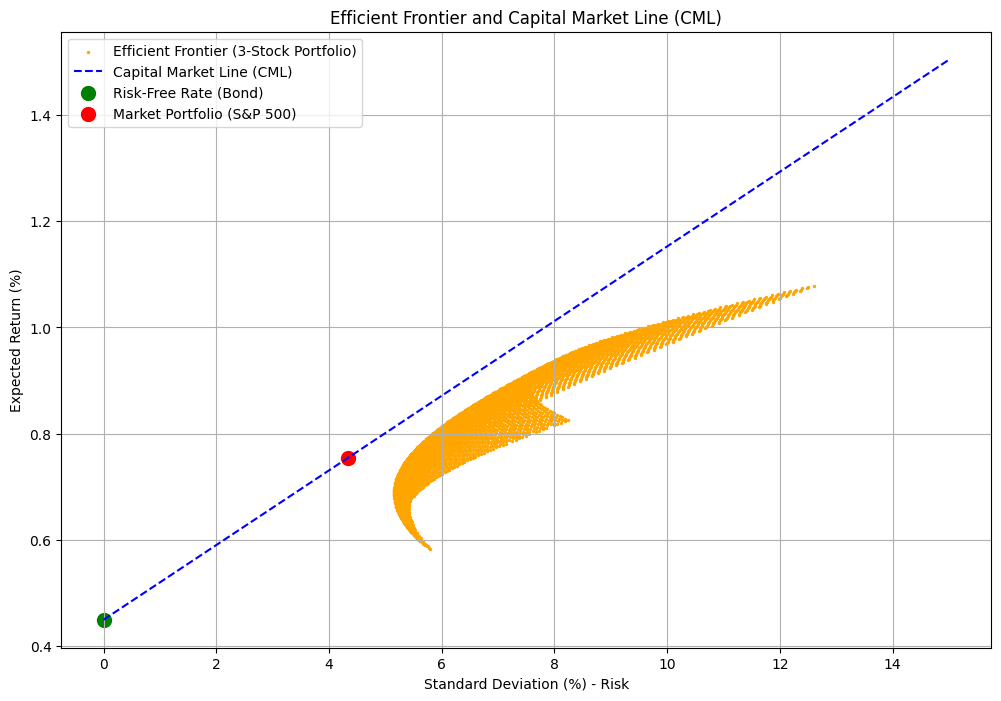

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Given values for the three stocks
returns = {'Harris': 0.5831, 'Urban': 0.8255, 'Maya': 1.0785}  # monthly returns in %
std_devs = {'Harris': 5.7984, 'Urban': 8.2439, 'Maya': 12.5993}  # monthly std dev in %
correlations = {
    ('Harris', 'Urban'): 0.3038,
    ('Harris', 'Maya'): 0.0801,
    ('Urban', 'Maya'): 0.2288
}

# Market portfolio (S&P 500) values
market_return = 0.7547  # monthly return in %
market_std_dev = 4.3376  # monthly std dev in %
risk_free_rate = 0.45  # monthly risk-free rate in %

# Calculate the efficient frontier by iterating over weight combinations
weights_range = np.linspace(0, 1, 100)
portfolio_returns = []
portfolio_risks = []

for w1 in weights_range:
    for w2 in weights_range:
        if w1 + w2 <= 1:
            w3 = 1 - w1 - w2
            # Portfolio return
            portfolio_return = (
                w1 * returns['Harris'] +
                w2 * returns['Urban'] +
                w3 * returns['Maya']
            )
            # Portfolio standard deviation
            portfolio_std_dev = np.sqrt(
                (w1 ** 2) * (std_devs['Harris'] ** 2) +
                (w2 ** 2) * (std_devs['Urban'] ** 2) +
                (w3 ** 2) * (std_devs['Maya'] ** 2) +
                2 * w1 * w2 * std_devs['Harris'] * std_devs['Urban'] * correlations[('Harris', 'Urban')] +
                2 * w1 * w3 * std_devs['Harris'] * std_devs['Maya'] * correlations[('Harris', 'Maya')] +
                2 * w2 * w3 * std_devs['Urban'] * std_devs['Maya'] * correlations[('Urban', 'Maya')]
            )
            # Store results
            portfolio_returns.append(portfolio_return)
            portfolio_risks.append(portfolio_std_dev)

# Capital Market Line (CML)
cml_risks = np.linspace(0, 15, 100)
cml_returns = risk_free_rate + ((market_return - risk_free_rate) / market_std_dev) * cml_risks

# Plotting the efficient frontier and CML
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risks, portfolio_returns, color="orange", s=2, label="Efficient Frontier (3-Stock Portfolio)")
plt.plot(cml_risks, cml_returns, color="blue", linestyle="--", label="Capital Market Line (CML)")

# Mark key points: risk-free rate and market portfolio
plt.scatter(0, risk_free_rate, color="green", marker="o", label="Risk-Free Rate (Bond)", s=100)
plt.scatter(market_std_dev, market_return, color="red", marker="o", label="Market Portfolio (S&P 500)", s=100)

# Labels and title
plt.xlabel("Standard Deviation (%) - Risk")
plt.ylabel("Expected Return (%)")
plt.title("Efficient Frontier and Capital Market Line (CML)")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import pandas as pd
import numpy as np

# Load data and skip initial rows to directly access returns data
data = pd.read_csv(r'C:\Users\Vidhi Singh\Desktop\CAPM_Data_Template - Monthly Returns.csv', skiprows=10)
data.columns = ['Year', 'Month', 'S&P 500', 'Harris', 'Urban', 'Maya']

# Drop any non-numeric values by forcing conversion to numeric
data[['S&P 500', 'Harris', 'Urban', 'Maya']] = data[['S&P 500', 'Harris', 'Urban', 'Maya']].apply(pd.to_numeric, errors='coerce')
data = data.dropna().reset_index(drop=True)

# Function to calculate alpha and beta manually
def calculate_alpha_beta(stock_returns, market_returns):
    # Calculate covariance and variance
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    market_variance = np.var(market_returns)
    
    # Calculate beta
    beta = covariance / market_variance
    
    # Calculate alpha
    alpha = np.mean(stock_returns) - beta * np.mean(market_returns)
    
    return alpha, beta

# Market returns (S&P 500) as independent variable
market_returns = data['S&P 500']

# Calculate alpha and beta for each stock
results = {}
for stock in ['Harris', 'Urban', 'Maya']:
    stock_returns = data[stock]
    alpha, beta = calculate_alpha_beta(stock_returns, market_returns)
    results[stock] = {'Alpha': alpha, 'Beta': beta}

# Display the results
results_df = pd.DataFrame(results).T
results_df.to_csv(r'C:\Users\Vidhi Singh\Desktop\Alpha Beta _Summary.csv')

print("Alpha and Beta for Each Stock Relative to the S&P 500:")
print(results_df)


Alpha and Beta for Each Stock Relative to the S&P 500:
           Alpha      Beta
Harris  0.286109  0.393495
Urban   0.111898  0.945588
Maya    0.090011  1.309708


In [42]:
import pandas as pd

# Given values
risk_free_rate = 0.45  # Monthly risk-free rate in %
market_risk_premium = 0.50  # Monthly market risk premium in %
betas = {'Harris': 0.3935, 'Urban': 0.9456, 'Maya': 1.3097}

# Step 1: Calculate Expected Monthly Return using CAPM
expected_returns = {}
for stock, beta in betas.items():
    expected_return = risk_free_rate + beta * market_risk_premium
    expected_returns[stock] = expected_return

# Step 2: Convert Monthly Expected Returns to Annual Expected Returns
annual_expected_returns = {stock: ((1 + expected_returns[stock] / 100) ** 12 - 1) * 100
                           for stock in expected_returns}

# Given realized mean monthly returns from Step 1
mean_monthly_realized_returns = {
    'Harris': 0.5831,
    'Urban': 0.8255,
    'Maya': 1.0785
}

# Step 3: Convert Monthly Realized Returns to Annual Realized Returns
annual_realized_returns = {stock: ((1 + mean_monthly_realized_returns[stock] / 100) ** 12 - 1) * 100
                           for stock in mean_monthly_realized_returns}

# Display the results
results_df = pd.DataFrame({
    "Beta": betas,
    "Expected Monthly Return (%)": expected_returns,
    "Annual Expected Return (%)": annual_expected_returns,
    "Annual Realized Return (%)": annual_realized_returns
})

print("Expected vs. Realized Returns Based on CAPM:")
print(results_df)
results_df.to_csv(r'C:\Users\Vidhi Singh\Desktop\Last _Summary.csv')



Expected vs. Realized Returns Based on CAPM:
          Beta  Expected Monthly Return (%)  Annual Expected Return (%)  \
Harris  0.3935                      0.64675                    8.043108   
Urban   0.9456                      0.92280                   11.653282   
Maya    1.3097                      1.10485                   14.094280   

        Annual Realized Return (%)  
Harris                    7.226023  
Urban                    10.368366  
Maya                     13.737967  


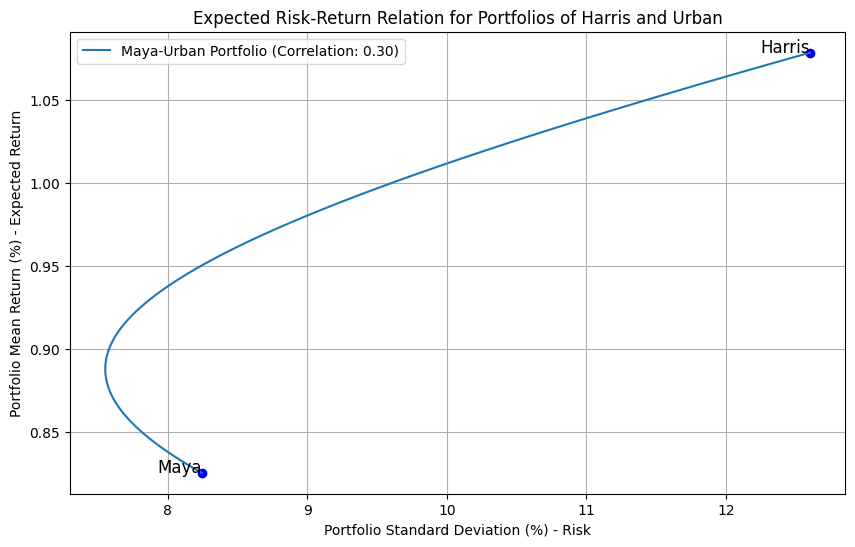

In [53]:
import numpy as np

# Define mean returns and standard deviations for Harris and Urban
mean_maya = data['Maya'].mean()
mean_urban = data['Urban'].mean()
std_maya = data['Maya'].std()
std_urban = data['Urban'].std()

# Define correlation between Harris and Urban
correlation_maya_urban = correlation_matrix.loc['Maya', 'Urban']

# Generate portfolio weights for Harris and Urban (varying from 0% to 100%)
weights = np.linspace(0, 1, 100)
portfolio_returns = []
portfolio_risks = []

# Calculate portfolio return and risk for each weight
for w in weights:
    # Portfolio return: weighted average of individual returns
    portfolio_return = w * mean_maya + (1 - w) * mean_urban
    
    # Portfolio risk (standard deviation)
    portfolio_risk = np.sqrt(
        (w * std_maya)**2 +
        ((1 - w) * std_urban)**2 +
        2 * w * (1 - w) * std_maya * std_urban * correlation_maya_urban
    )
    
    # Store the results
    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)

# Plot the risk-return profile
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, portfolio_returns, label=f'Maya-Urban Portfolio (Correlation: {correlation_harris_urban:.2f})')
plt.scatter([std_maya, std_urban], [mean_maya, mean_urban], color='blue')  # Mark individual stocks
plt.text(std_maya, mean_maya, 'Harris', fontsize=12, ha='right')
plt.text(std_urban, mean_urban, 'Maya', fontsize=12, ha='right')

# Set labels and title
plt.xlabel('Portfolio Standard Deviation (%) - Risk')
plt.ylabel('Portfolio Mean Return (%) - Expected Return')
plt.title('Expected Risk-Return Relation for Portfolios of Harris and Urban')
plt.legend()
plt.grid(True)
plt.show()

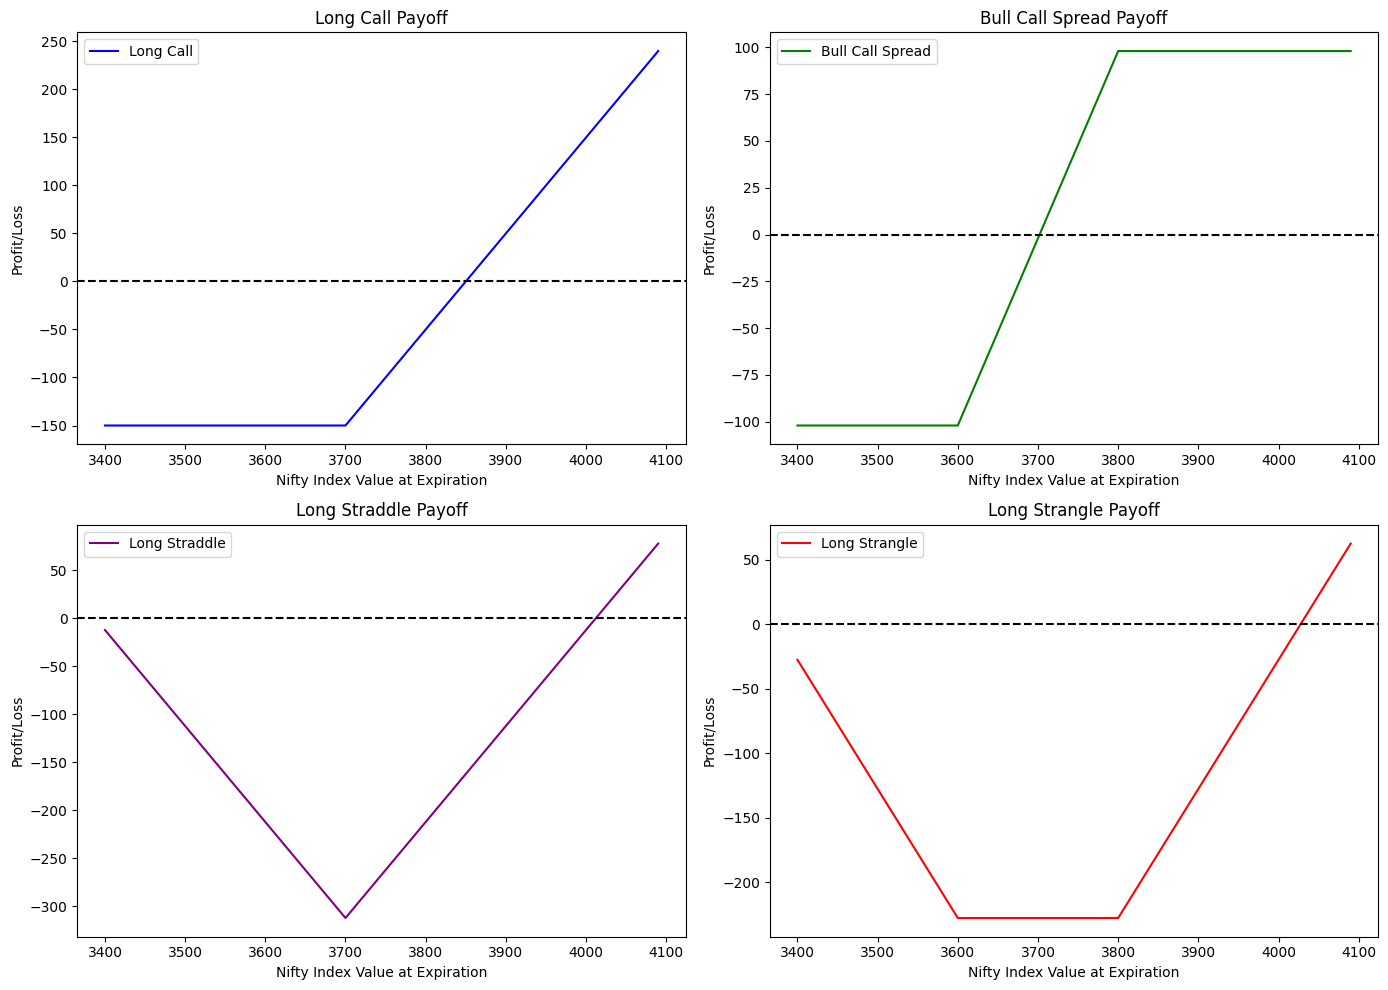

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Market data and strategy parameters
nifty_spot = 3671.65
nifty_range = np.arange(3400, 4100, 10)

# Strategy Parameters
strike_long_call = 3700
premium_long_call = 150

strike_buy_bull_spread = 3600
strike_sell_bull_spread = 3800
premium_buy_bull_spread = 210
premium_sell_bull_spread = 108

strike_straddle = 3700
premium_call_straddle = 150
premium_put_straddle = 162

strike_put_strangle = 3600
strike_call_strangle = 3800
premium_put_strangle = 119.65
premium_call_strangle = 108

# Calculate Payoffs
def long_call_payoff(s, strike, premium):
    return np.maximum(s - strike, 0) - premium

def bull_call_spread_payoff(s, strike_buy, strike_sell, premium_buy, premium_sell):
    payoff_buy = np.maximum(s - strike_buy, 0) - premium_buy
    payoff_sell = premium_sell - np.maximum(s - strike_sell, 0)
    return payoff_buy + payoff_sell

def long_straddle_payoff(s, strike, premium_call, premium_put):
    payoff_call = np.maximum(s - strike, 0) - premium_call
    payoff_put = np.maximum(strike - s, 0) - premium_put
    return payoff_call + payoff_put

def long_strangle_payoff(s, strike_put, strike_call, premium_put, premium_call):
    payoff_call = np.maximum(s - strike_call, 0) - premium_call
    payoff_put = np.maximum(strike_put - s, 0) - premium_put
    return payoff_call + payoff_put

# Calculate Payoffs for each strategy
long_call = long_call_payoff(nifty_range, strike_long_call, premium_long_call)
bull_call_spread = bull_call_spread_payoff(nifty_range, strike_buy_bull_spread, strike_sell_bull_spread, premium_buy_bull_spread, premium_sell_bull_spread)
long_straddle = long_straddle_payoff(nifty_range, strike_straddle, premium_call_straddle, premium_put_straddle)
long_strangle = long_strangle_payoff(nifty_range, strike_put_strangle, strike_call_strangle, premium_put_strangle, premium_call_strangle)

# Plotting the Payoffs
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Long Call Payoff Plot
axs[0, 0].plot(nifty_range, long_call, label="Long Call", color="blue")
axs[0, 0].axhline(0, color="black", linestyle="--")
axs[0, 0].set_title("Long Call Payoff")
axs[0, 0].set_xlabel("Nifty Index Value at Expiration")
axs[0, 0].set_ylabel("Profit/Loss")
axs[0, 0].legend()

# Bull Call Spread Payoff Plot
axs[0, 1].plot(nifty_range, bull_call_spread, label="Bull Call Spread", color="green")
axs[0, 1].axhline(0, color="black", linestyle="--")
axs[0, 1].set_title("Bull Call Spread Payoff")
axs[0, 1].set_xlabel("Nifty Index Value at Expiration")
axs[0, 1].set_ylabel("Profit/Loss")
axs[0, 1].legend()

# Long Straddle Payoff Plot
axs[1, 0].plot(nifty_range, long_straddle, label="Long Straddle", color="purple")
axs[1, 0].axhline(0, color="black", linestyle="--")
axs[1, 0].set_title("Long Straddle Payoff")
axs[1, 0].set_xlabel("Nifty Index Value at Expiration")
axs[1, 0].set_ylabel("Profit/Loss")
axs[1, 0].legend()

# Long Strangle Payoff Plot
axs[1, 1].plot(nifty_range, long_strangle, label="Long Strangle", color="red")
axs[1, 1].axhline(0, color="black", linestyle="--")
axs[1, 1].set_title("Long Strangle Payoff")
axs[1, 1].set_xlabel("Nifty Index Value at Expiration")
axs[1, 1].set_ylabel("Profit/Loss")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


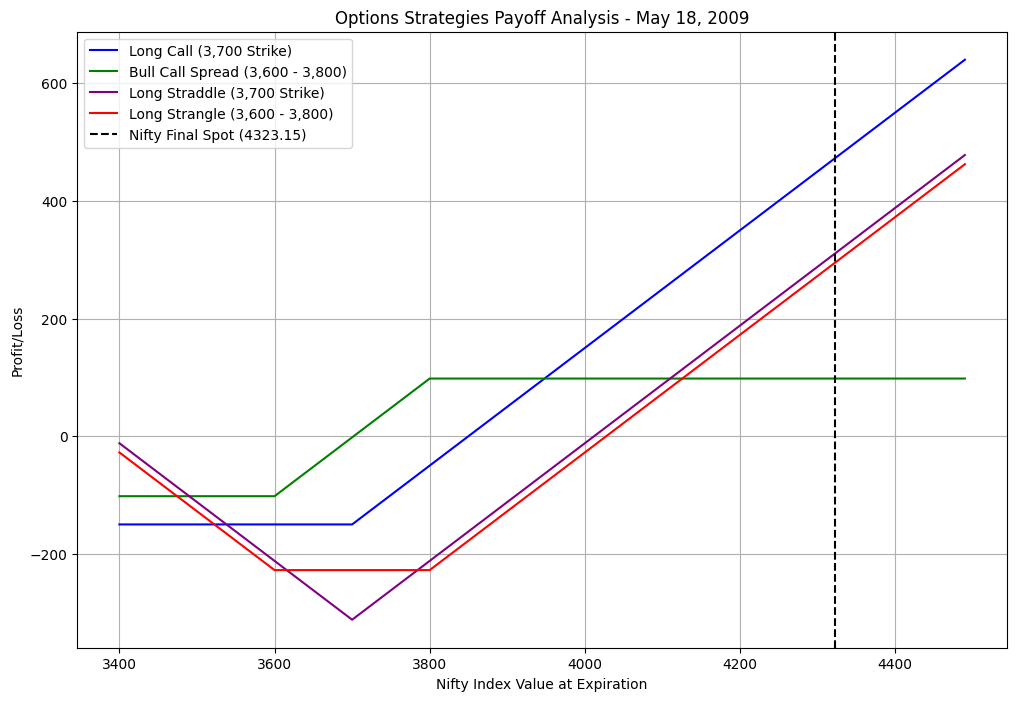

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# May 15 and May 18 data
nifty_spot_initial = 3671.65
nifty_spot_final = 4323.15

# Strike prices and premiums
strike_call = 3700
premium_call = 150

strike_put = 3700
premium_put = 162

strike_call_strangle = 3800
strike_put_strangle = 3600
premium_call_strangle = 108
premium_put_strangle = 119.65

strike_buy_bull = 3600
strike_sell_bull = 3800
premium_buy_bull = 210
premium_sell_bull = 108

# Payoff functions
def calculate_payoff_long_call(final_price, strike, premium):
    return max(0, final_price - strike) - premium

def calculate_payoff_bull_spread(final_price, strike_buy, strike_sell, premium_buy, premium_sell):
    payoff_buy = max(0, final_price - strike_buy) - premium_buy
    payoff_sell = premium_sell - max(0, final_price - strike_sell)
    return payoff_buy + payoff_sell

def calculate_payoff_straddle(final_price, strike, premium_call, premium_put):
    payoff_call = max(0, final_price - strike) - premium_call
    payoff_put = max(0, strike - final_price) - premium_put
    return payoff_call + payoff_put

def calculate_payoff_strangle(final_price, strike_call, strike_put, premium_call, premium_put):
    payoff_call = max(0, final_price - strike_call) - premium_call
    payoff_put = max(0, strike_put - final_price) - premium_put
    return payoff_call + payoff_put

# Price range for visualization
price_range = np.arange(3400, 4500, 10)

# Calculate payoffs
long_call_payoff = [calculate_payoff_long_call(p, strike_call, premium_call) for p in price_range]
bull_spread_payoff = [calculate_payoff_bull_spread(p, strike_buy_bull, strike_sell_bull, premium_buy_bull, premium_sell_bull) for p in price_range]
straddle_payoff = [calculate_payoff_straddle(p, strike_call, premium_call, premium_put) for p in price_range]
strangle_payoff = [calculate_payoff_strangle(p, strike_call_strangle, strike_put_strangle, premium_call_strangle, premium_put_strangle) for p in price_range]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(price_range, long_call_payoff, label='Long Call (3,700 Strike)', color='blue')
plt.plot(price_range, bull_spread_payoff, label='Bull Call Spread (3,600 - 3,800)', color='green')
plt.plot(price_range, straddle_payoff, label='Long Straddle (3,700 Strike)', color='purple')
plt.plot(price_range, strangle_payoff, label='Long Strangle (3,600 - 3,800)', color='red')

# Marking final Nifty Spot
plt.axvline(x=nifty_spot_final, color='black', linestyle='--', label=f'Nifty Final Spot ({nifty_spot_final})')

# Labels and title
plt.title("Options Strategies Payoff Analysis - May 18, 2009")
plt.xlabel("Nifty Index Value at Expiration")
plt.ylabel("Profit/Loss")
plt.legend()
plt.grid()
plt.show()


In [9]:
# Hedge ratio calculation
icici_call_initial_price = 58.5
icici_call_final_price = 248
icici_underlying_initial = 574.7
icici_underlying_final = 756.15

reliance_call_initial_price = 130
reliance_call_final_price = 370
reliance_underlying_initial = 1950.7
reliance_underlying_final = 2230.9

# Delta calculation for ICICI 540 Call
icici_delta = (icici_call_final_price - icici_call_initial_price) / (icici_underlying_final - icici_underlying_initial)

# Delta calculation for Reliance 1890 Call
reliance_delta = (reliance_call_final_price - reliance_call_initial_price) / (reliance_underlying_final - reliance_underlying_initial)

print("ICICI 540 Call Delta (Hedge Ratio):", icici_delta)
print("Reliance 1890 Call Delta (Hedge Ratio):", reliance_delta)


ICICI 540 Call Delta (Hedge Ratio): 1.0443648387985676
Reliance 1890 Call Delta (Hedge Ratio): 0.8565310492505352


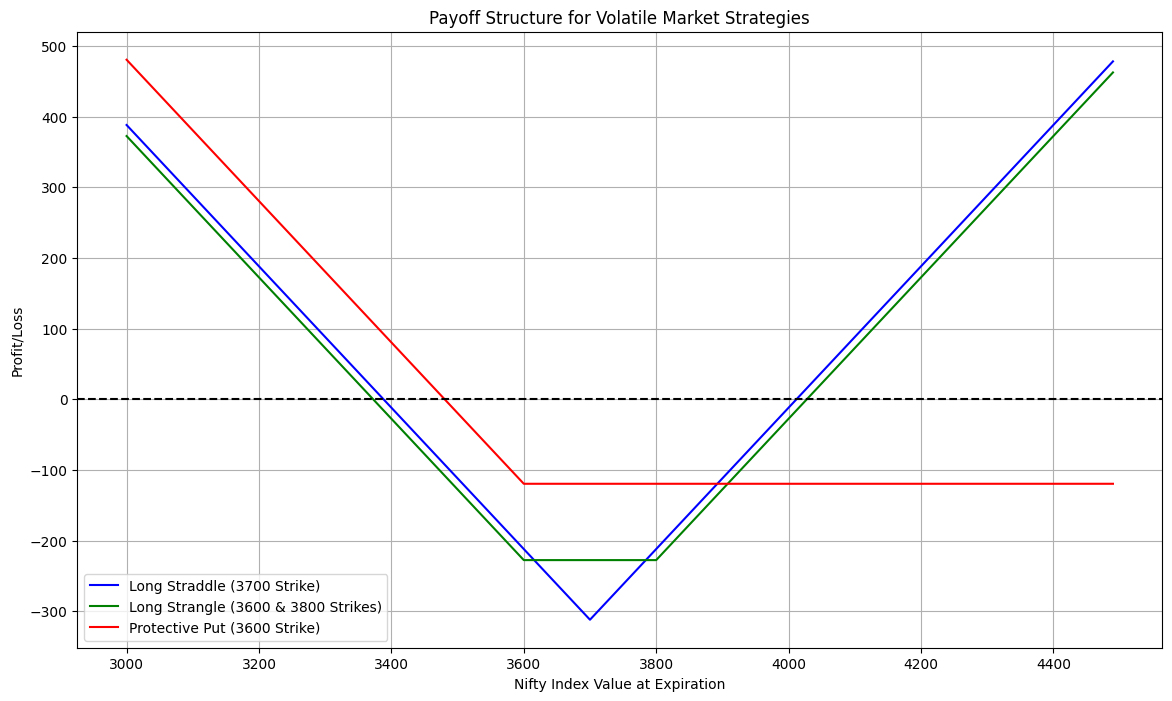

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define Nifty levels for testing (simulate extreme volatility scenario)
nifty_range = np.arange(3000, 4500, 10)

# Strategy Parameters
strike_straddle = 3700
premium_call_straddle = 150
premium_put_straddle = 162

strike_put_strangle = 3600
strike_call_strangle = 3800
premium_put_strangle = 119.65
premium_call_strangle = 108

protective_put_strike = 3600
protective_put_premium = 119.65

# Payoff functions
def long_straddle_payoff(s, strike, premium_call, premium_put):
    payoff_call = np.maximum(s - strike, 0) - premium_call
    payoff_put = np.maximum(strike - s, 0) - premium_put
    return payoff_call + payoff_put

def long_strangle_payoff(s, strike_call, strike_put, premium_call, premium_put):
    payoff_call = np.maximum(s - strike_call, 0) - premium_call
    payoff_put = np.maximum(strike_put - s, 0) - premium_put
    return payoff_call + payoff_put

def protective_put_payoff(s, strike, premium):
    payoff_put = np.maximum(strike - s, 0) - premium
    return payoff_put

# Calculate payoffs for each strategy
straddle_payoff = [long_straddle_payoff(p, strike_straddle, premium_call_straddle, premium_put_straddle) for p in nifty_range]
strangle_payoff = [long_strangle_payoff(p, strike_call_strangle, strike_put_strangle, premium_call_strangle, premium_put_strangle) for p in nifty_range]
protective_put_payoff = [protective_put_payoff(p, protective_put_strike, protective_put_premium) for p in nifty_range]

# Plotting the Payoff Structures
plt.figure(figsize=(14, 8))

# Long Straddle Payoff Plot
plt.plot(nifty_range, straddle_payoff, label="Long Straddle (3700 Strike)", color="blue")

# Long Strangle Payoff Plot
plt.plot(nifty_range, strangle_payoff, label="Long Strangle (3600 & 3800 Strikes)", color="green")

# Protective Put Payoff Plot (assuming Nifty is held as a long position)
plt.plot(nifty_range, protective_put_payoff, label="Protective Put (3600 Strike)", color="red")

# Add labels and legend
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Nifty Index Value at Expiration")
plt.ylabel("Profit/Loss")
plt.title("Payoff Structure for Volatile Market Strategies")
plt.legend()
plt.grid()
plt.show()


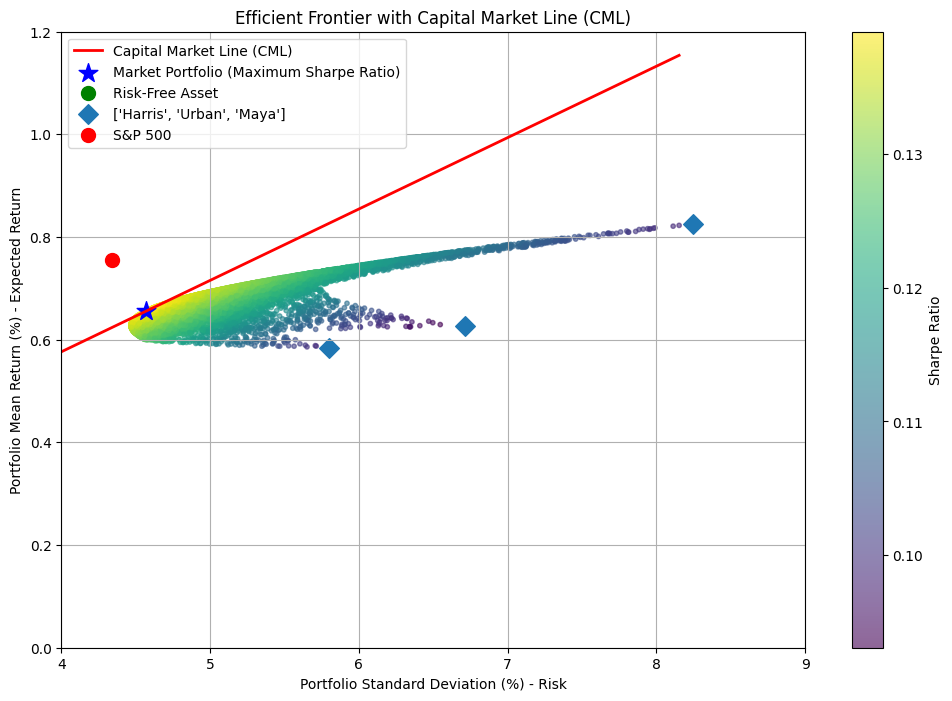

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Harris, Urban, Maya
mean_returns = np.array([0.5831, 0.8255, 0.6277])  # Expected returns for Harris, Urban, Maya
std_devs = np.array([5.7984, 8.2439, 6.7116])      # Standard deviations
correlations = np.array([
    [1, 0.303819135, 0.080083664],
    [0.303819135, 1, 0.228829229],
    [0.080083664, 0.228829229, 1]
])
cov_matrix = np.outer(std_devs, std_devs) * correlations

# Risk-free rate
risk_free_rate = 0.02

# Generate random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(3)
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    # Portfolio return and risk
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Store results
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev  # Sharpe ratio

# Identify portfolio with maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
sdp_max = results[0, max_sharpe_idx]
rp_max = results[1, max_sharpe_idx]
optimal_weights = weights_record[max_sharpe_idx]

# Plotting the efficient frontier and CML with zoomed view
plt.figure(figsize=(12, 8))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', marker='o', s=10, alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Standard Deviation (%) - Risk')
plt.ylabel('Portfolio Mean Return (%) - Expected Return')
plt.title('Efficient Frontier with Capital Market Line (CML)')

# Plot the CML
x = np.linspace(0, max(results[0, :]), 100)
cml = risk_free_rate + ((rp_max - risk_free_rate) / sdp_max) * x
plt.plot(x, cml, color='red', lw=2, label='Capital Market Line (CML)')

# Mark the maximum Sharpe ratio portfolio (Market Portfolio)
plt.scatter(sdp_max, rp_max, marker='*', color='blue', s=200, label='Market Portfolio (Maximum Sharpe Ratio)')

# Mark the risk-free asset
plt.scatter(0, risk_free_rate, marker='o', color='green', s=100, label='Risk-Free Asset')

# Plot individual assets
plt.scatter(std_devs, mean_returns, marker='D', s=100, label=['Harris', 'Urban', 'Maya'])

# Mark S&P 500 on the graph
sp500_std_dev = 4.337642
sp500_return = 0.754708
plt.scatter(sp500_std_dev, sp500_return, color='red', marker='o', s=100, label='S&P 500')

# Zoom into the specific region around the efficient frontier and CML tangency
plt.xlim(4, 9)  # Adjust x-axis limit for zoom
plt.ylim(0, 1.2)  # Adjust y-axis limit for zoom

plt.legend()
plt.grid(True)
plt.show()


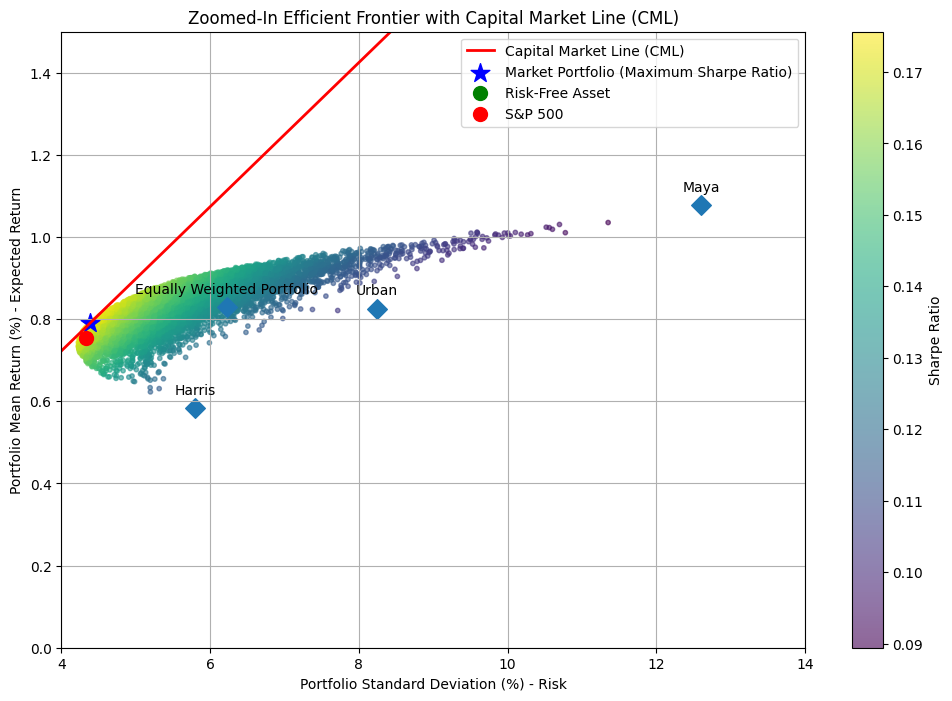

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Updated data for Harris, Urban, Maya, and Equally Weighted Portfolio
mean_returns = np.array([0.583083, 0.825542, 1.078458, 0.829028])  # Expected returns for Harris, Urban, Maya, Equally Weighted Portfolio
std_devs = np.array([5.798418, 8.243906, 12.59934, 6.223702])      # Standard deviations

correlations = np.array([
    [1, 0.303819135, 0.080083664, 0.1],
    [0.303819135, 1, 0.228829229, 0.1],
    [0.080083664, 0.228829229, 1, 0.1],
    [0.1, 0.1, 0.1, 1]
])
cov_matrix = np.outer(std_devs, std_devs) * correlations

# Risk-free rate
risk_free_rate = 0.02

# Generate random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(4)
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    # Portfolio return and risk
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Store results
    results[0, i] = portfolio_std_dev
    results[1, i] = portfolio_return
    results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev  # Sharpe ratio

# Identify portfolio with maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
sdp_max = results[0, max_sharpe_idx]
rp_max = results[1, max_sharpe_idx]
optimal_weights = weights_record[max_sharpe_idx]

# Plotting the efficient frontier and CML with zoomed view
plt.figure(figsize=(12, 8))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', marker='o', s=10, alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Standard Deviation (%) - Risk')
plt.ylabel('Portfolio Mean Return (%) - Expected Return')
plt.title('Zoomed-In Efficient Frontier with Capital Market Line (CML)')

# Plot the CML
x = np.linspace(0, max(results[0, :]), 100)
cml = risk_free_rate + ((rp_max - risk_free_rate) / sdp_max) * x
plt.plot(x, cml, color='red', lw=2, label='Capital Market Line (CML)')

# Mark the maximum Sharpe ratio portfolio (Market Portfolio)
plt.scatter(sdp_max, rp_max, marker='*', color='blue', s=200, label='Market Portfolio (Maximum Sharpe Ratio)')

# Mark the risk-free asset
plt.scatter(0, risk_free_rate, marker='o', color='green', s=100, label='Risk-Free Asset')

# Plot individual assets with labels
plt.scatter(std_devs, mean_returns, marker='D', s=100)
for i, txt in enumerate(['Harris', 'Urban', 'Maya', 'Equally Weighted Portfolio']):
    plt.annotate(txt, (std_devs[i], mean_returns[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Mark S&P 500 on the graph
sp500_std_dev = 4.337642
sp500_return = 0.754708
plt.scatter(sp500_std_dev, sp500_return, color='red', marker='o', s=100, label='S&P 500')

# Zoom into the specific region around the efficient frontier and CML tangency
plt.xlim(4, 14)  # Adjust x-axis limit for zoom
plt.ylim(0, 1.5)  # Adjust y-axis limit for zoom

plt.legend()
plt.grid(True)
plt.show()
